In [14]:
topdir_obiwan_out='/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/'
name_for_run='real_lrg_seed'
rs_type='rs0'
region='south'
band = 'g'
idx=3

In [15]:
%pylab inline
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import os

Populating the interactive namespace from numpy and matplotlib


In [16]:
brickname='0450p057'

In [17]:

topdir = topdir_obiwan_out+\
name_for_run+'/output/'

fn = os.path.join(topdir,'coadd',brickname[:3],brickname,rs_type,'legacysurvey-'+brickname+'-image-'+band+'.fits.fz')

coadd = fits.getdata(fn)

In [18]:
fn = os.path.join(topdir,'tractor',brickname[:3],brickname,rs_type,'tractor-'+brickname+'.fits')

tractor = fits.getdata(fn)

In [19]:
fn = os.path.join(topdir,'coadd',brickname[:3],brickname,rs_type,'legacysurvey-'+brickname+'-model-'+band+'.fits.fz')

model = fits.getdata(fn)

In [20]:
topdir_dr9 = '/global/project/projectdirs/cosmo/data/legacysurvey/dr9/'+region
fn = os.path.join(topdir_dr9,'coadd',brickname[:3], brickname, 'legacysurvey-'+brickname+'-model-'+band+'.fits.fz')
#print(fn)
tractor_model_origin = fits.getdata(fn)

In [21]:
fn = os.path.join(topdir,'coadd',brickname[:3],brickname,rs_type,'legacysurvey-'+brickname+'-sims-'+band+'.fits.fz')
sim = fits.getdata(fn)
#print(fn)

In [22]:

matched = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/wise_ebv1000_faint/subset/sim_wise_ebv1000_faint.fits')
sel = (matched['brickname']==brickname)&(matched['detected'])

sources = matched[sel]

In [23]:
fn = '/global/project/projectdirs/cosmo/data/legacysurvey/dr9/'+region+'/coadd/'+\
brickname[:3]+'/'+brickname+'/legacysurvey-'+brickname+'-image-'+band+'.fits.fz'

tractor_origin = fits.getdata(fn)

3224.8 966.56
1.95101
1.83387
-0.0580465
0.00990429


Text(0.5,0,'tractor model image')

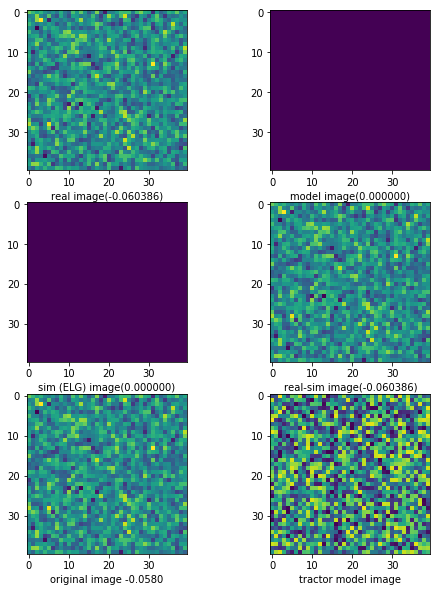

In [29]:
i=1
bx=sources['bx'][i]
by=sources['by'][i]
print(bx,by)
bx = 150
by = 100
radius = 20
print(sources['flux_z'][i])
print(sources['sim_zflux'][i])

plt.figure(figsize = (8,10))
plt.subplot(3,2,1)
x_cen = int(bx)
y_cen = int(by)
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('real image(%f)'%dat.sum())

plt.subplot(3,2,2)
x_cen = int(bx)
y_cen = int(by)
dat = model[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('model image(%f)'%dat.sum())

plt.subplot(3,2,3)
y_cen = int(by)
x_cen = int(bx)
dat = sim[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('sim (ELG) image(%f)'%dat.sum())
plt.subplot(3,2,4)

x_cen = int(bx)
y_cen = int(by)
dat = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
sim[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)

plt.xlabel('real-sim image(%f)'%dat.sum())

plt.subplot(3,2,5)
x_cen = int(bx)
y_cen = int(by)
dat = tractor_origin[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
plt.imshow(dat)
plt.xlabel('original image %.4f'%dat.sum())
print(dat.sum())
print(dat.max()-dat.min())


plt.subplot(3,2,6)
x_cen = int(bx)
y_cen = int(by)
dat = tractor_model_origin[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
#vmax = dat.max()
plt.imshow(dat)
plt.xlabel('tractor model image')


In [44]:
np.sqrt(((coadd+sim-tractor_origin)*(coadd+sim-tractor_origin)).sum())/3600**2

3.6416301664746838e-08

In [42]:
(coadd+sim-tractor_origin).sum()

7.4507856

In [43]:
sim.sum()

4.1400914

In [41]:
1/1739413.8862098514

5.749062991436617e-07

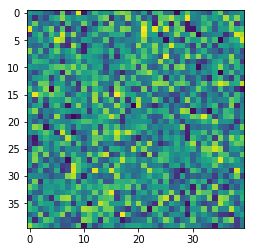

In [25]:
dat1 = coadd[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]-\
sim[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
dat2 = tractor_origin[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius]
dat = dat1-dat2
plt.imshow(dat)

In [26]:
tractor_origin[y_cen-radius:y_cen+radius,x_cen-radius:x_cen+radius].max()

0.0099064615

(array([  44.,   87.,  162.,  218.,  296.,  293.,  212.,  161.,   93.,   34.]),
 array([ -9.57612065e-05,  -7.64290628e-05,  -5.70969190e-05,
         -3.77647753e-05,  -1.84326316e-05,   8.99512088e-07,
          2.02316558e-05,   3.95637995e-05,   5.88959432e-05,
          7.82280869e-05,   9.75602306e-05]),
 <a list of 10 Patch objects>)

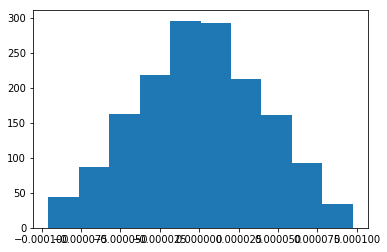

In [27]:
plt.hist(dat.ravel())

In [28]:
dat.ravel().max()

9.7560231e-05